In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [84]:
log_path = Path("/home/kafka/repos/thesis/logs_desktop")
MACHINE = "desktop"
BATCH_SIZE = 128
DATASET = "cifar10"

model_name = f"resnet18_bs_{BATCH_SIZE}"

model_path_prefix = "resnet18_pretrained_pid"

# Single training
train_path = log_path / "single_runs_combined" / DATASET
#train_path_2 = log_path / "single_runs_2" / DATASET

# Shared data training
train_mul_path = log_path / "queues_combined" / DATASET / model_name
#train_mul_path_2 = log_path / "queues_2" / DATASET / model_name

naive_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_8tw_1vw_pid"
shared_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_8tw_1vw_1pf_pid"

if DATASET == "compcars":
    # CompCars, BS 128
    pids = [
        7582, 7792, # Naive
        8158, 8372, # MPS
        12500, 12766, # Shared
        13113, 13396, # Shared + MPS
        10394, 10499, # Naive + DALI
        13738, 13861, # Shared + DALI
        6129, 6269, # Naive + DALI + MPS
        6514, 6672, # Shared + DALI + MPS
        1951400, 1988951, # Naive, Dummy data
    ]

    trace_pids = [
        7582, 7792, # Naive
        8158, 8372, # MPS
        12468, 12734, # Shared
        13081, 13364, # Shared + MPS
        10394, 10499, # Naive + DALI
        13712, 13835, # Shared + DALI
        6129, 6269, # Naive + DALI + MPS
        6488, 6643, # Shared + DALI + MPS
        1951400, 1988951, # Naive, Dummy data
    ]

if DATASET == "imagenet_10pct":
    pids = [
        19204, 19490, # Naive
        20035, 20340, # MPS
        20904, 21238, # Shared
        21774, 22158, # Shared + MPS
        22662, 0, # Naive DALI
        22871, 23021# Shared DALI
    ]

    trace_pids = [
        19204, 19490, # Naive
        20035, 20340, # MPS
        20872, 21206, # Shared
        21743, 22126, # Shared + MPS
        22662, 0, # Naive DALI
        22845, 22995, # Shared DALI
    ]

if DATASET == "cifar10":
    pids = [
        #6821, 6944, 7136, 7408, # Naive
        6321, 6532, 6853, 7297, 8517, 9264, 10148, 11169, # Naive
        9540, 9712, 10018, 10457, 12308, 13082, 13971, 14977,  # MPS
        9825, 10062, 10350, 10683, 16178, 16618, 17105, 17638, # Shared
        11082, 11353, 11663, 12023, 18251, 18708, 19208, 19761, # Shared + MPS
        #11040, 11832, 12739, 14775, # Naive DALI
        7876, 7987, 8181, 8457,  # Naive DALI
        12414, 12542, 12717, 12940, 20347, 20670, 21048, 21467, # Shared DALI
    ]

    trace_pids = [
        #6821, 6944, 7136, 7408, # Naive
        6321, 6532, 6853, 7297, 8517, 9264, 10148, 11169, # Naive
        9540, 9712, 10018, 10457, 12308, 13082, 13971, 14977,  # MPS
        9792, 10030, 10318, 10651, 16145, 16586, 17073, 17606, # Shared
        11049, 11320, 11630, 11991, 18219, 18676, 19176, 19729, # Shared + MPS
        #11040, 11832, 12739, 14775, # Naive DALI
        7876, 7987, 8181, 8457, # Naive DALI
        12388, 12516, 12691, 12914, 20321, 20644, 21017, 21441, # Shared DALI
    ]


In [85]:
if DATASET == "cifar10":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18", "5x RN18", "6x RN18", "7x RN18", "8x RN18")

    #naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(0, 4)]
    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(0, 8)]
    naive = [df.iloc[2:]["total_time"].mean() for df in naive]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(8, 16)]
    mps = [df.iloc[2:]["total_time"].mean() for df in mps]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(16, 24)]
    shared = [df.iloc[2:]["total_time"].mean() for df in shared]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(24, 32)]
    shared_mps = [df.iloc[2:]["total_time"].mean() for df in shared_mps]

    #naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(16, 20)]
    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(32, 36)]
    naive_dali = [df.iloc[2:]["total_time"].mean() for df in naive_dali]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(36, 44)]
    shared_dali = [df.iloc[2:]["total_time"].mean() for df in shared_dali]
    
if DATASET == "imagenet_10pct":
    workloads = ("1x RN18", "2x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(0, 2)]
    naive = [df.iloc[2:]["total_time"].mean() for df in naive]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(2, 4)]
    mps = [df.iloc[2:]["total_time"].mean() for df in mps]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(4, 6)]
    shared = [df.iloc[2:]["total_time"].mean() for df in shared]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(6, 8)]
    shared_mps = [df.iloc[2:]["total_time"].mean() for df in shared_mps]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(8, 9)]
    naive_dali = [df.iloc[2:]["total_time"].mean() for df in naive_dali] + [0]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(10, 11)]
    shared_dali = [df.iloc[2:]["total_time"].mean() for df in shared_dali] + [0]
    


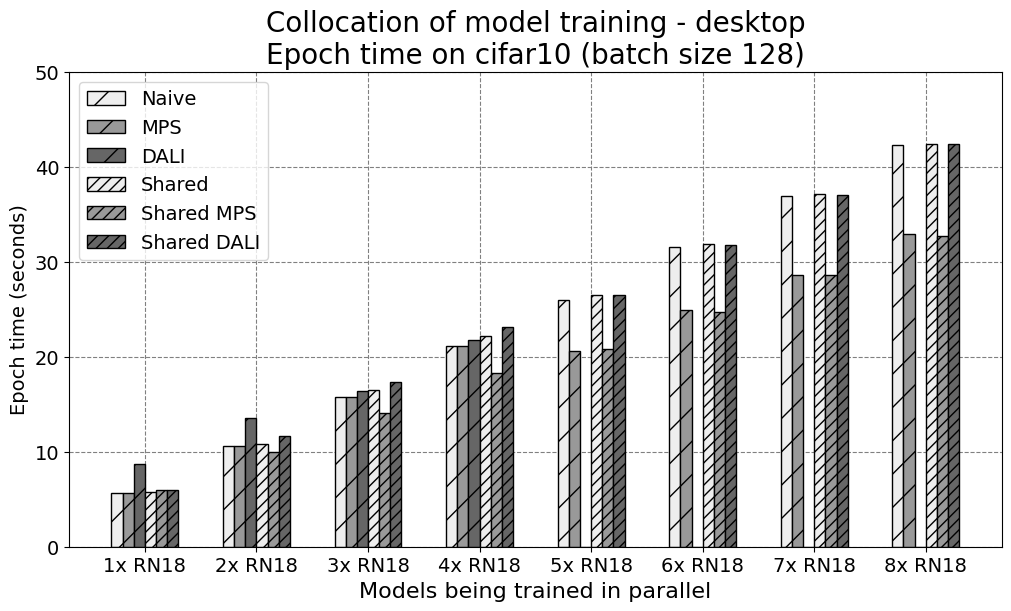

In [88]:
import matplotlib.pyplot as plt
import numpy as np

measurements ={
    "Naive": naive,
    "MPS": mps,
    "DALI": naive_dali + [0,0,0,0],
    "Shared": shared,
    "Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(10,6))
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666", 
              "#eeeeee", "#999999", "#666666"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Epoch time (seconds)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nEpoch time on {DATASET} (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 51, 10)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [6]:
def get_mem(dfs):
    mems = []
    for df in dfs:
        df["mem"] = df.apply(lambda x: x[" used_gpu_memory [MiB]"].strip(" MiB"), axis=1).astype(int)
        mem = df.groupby([" pid"]).max()["mem"].sum()
        mems.append(mem)
    return mems

In [7]:
# BASELINE
if DATASET == "cifar10":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")

    #naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(0, 4)]
    naive = [pd.read_csv(train_path_2 / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(0, 4)]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(4, 8)]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(8, 12)]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(12, 16)]

    #naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(16, 20)]
    naive_dali = [pd.read_csv(train_path_2 / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(16, 20)]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(20, 24)]
    
if DATASET == "imagenet_10pct":
    workloads = ("1x RN18", "2x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(0, 2)]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(2, 4)]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(4, 6)]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(6, 8)]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(8, 9)]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(10, 11)]

naive_mem = get_mem(naive)
mps_mem = get_mem(mps)
shared_mem = get_mem(shared)
shared_mps_mem = get_mem(shared_mps)
naive_dali_mem = get_mem(naive_dali)
shared_dali_mem = get_mem(shared_dali)

if DATASET == "imagenet_10pct":
    naive_dali_mem.append(0)
    shared_dali_mem.append(0)



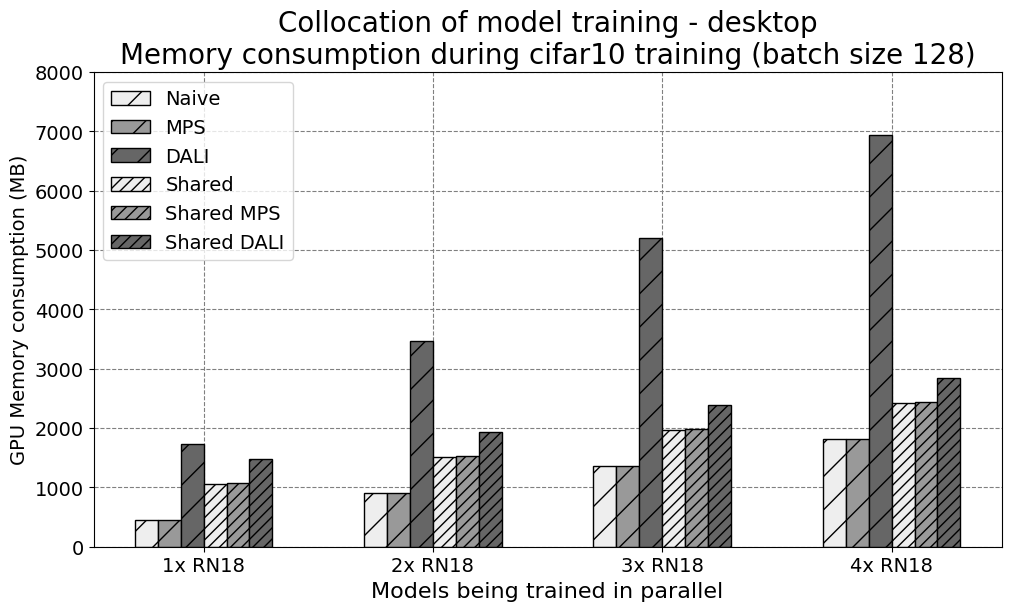

In [8]:
import matplotlib.pyplot as plt
import numpy as np


measurements ={
    "Naive": naive_mem,
    "MPS": mps_mem,
    "DALI": naive_dali_mem,
    "Shared": shared_mem,
    "Shared MPS": shared_mps_mem,
    "Shared DALI": shared_dali_mem,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(10,6))
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666", 
              "#eeeeee", "#999999", "#666666"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('GPU Memory consumption (MB)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nMemory consumption during {DATASET} training (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 8192, 1000)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [16]:
cols = ["time", "cpu", "%usr", "%nice", "%sys", "%iowait", "%irq", "%soft", "%steal", "%guest", "%gnice", "%idle"]

def create_plottable_df(path, log_path):
    with open(path) as f:
        lines = f.readlines()
        lines = [l for l in lines if l != "\n"]
        lines = [l.strip() for l in lines if not "CPU" in l]
        lines = [l.split() for l in lines]
    df_log = pd.read_csv(log_path)
    last_time = (pd.to_datetime(df_log['timestamp'], unit="s", utc=True).dt.tz_convert('Europe/Berlin')).iloc[-1].to_datetime64()
    date = (pd.to_datetime(df_log['timestamp'], unit="s", utc=True).dt.tz_convert('Europe/Berlin')).iloc[-1].date().strftime("%Y-%m-%d ")
    new_lines = []

    for line in lines:
        new_line = []
        for idx, l in enumerate(line):
            if idx == 0:
                new_line.append(l)
            else:
                new_line.append(float(l))
        new_lines.append(new_line)
    df = pd.DataFrame(new_lines, columns=cols)
    df['time'] = date + df['time']
    df['running_seconds'] = pd.to_datetime(df['time']) - pd.DateOffset(hours=2)
    df = df[pd.to_datetime(df['running_seconds']) < last_time]

    first_timestamp = df['running_seconds'].iloc[0]
    df['running_seconds'] = (df['running_seconds'] - first_timestamp).dt.total_seconds()
    df['running_seconds_normalized'] = (df['running_seconds'] - df['running_seconds'].min()) / (df['running_seconds'].max() - df['running_seconds'].min()) * 99 + 1
    
    return df

In [71]:
def plot_dfs(dfs, title, titles, metric, normalized=True):
    xs = []
    ys = []
    fig, ax = plt.subplots(figsize=(8,4))
    width = 0.25  # the width of the bars
    multiplier = -1.5
    
        
    for idx, df in enumerate(dfs):
        #average_all_cpus = df.groupby(group)[metric].mean()
        avg = df[metric].mean()
        xs.append(idx)
        ys.append(avg)

        #plt.plot(average_all_cpus.index, average_all_cpus.values, \
        #            linewidth=1, label=titles[idx])
        #plt.hist(xs, ys, label=titles[idx])
    #return xs, ys
    ax.bar(xs, ys, width, color="#666666")
    ax.set_xticks(xs, titles, fontsize=10, rotation=45, ha="right")
    #if normalized:
    #    plt.xlabel('Running time, normalized %')
    #else:
    #    plt.xlabel('Running time (seconds)')
    if metric in ["%usr", "%nice"]:
        plt.ylabel('% CPU Utilization')
        plt.title(f'{title}\nCPU Usage')
    if metric == "%iowait":
        plt.ylabel('% I/O wait')
        plt.title(f'{title}\nI/O wait')
    #plt.legend()
    ax.set_axisbelow(True)
    ax.grid(color='gray', linestyle='dashed')
    plt.ylim(0,100)
    plt.show()

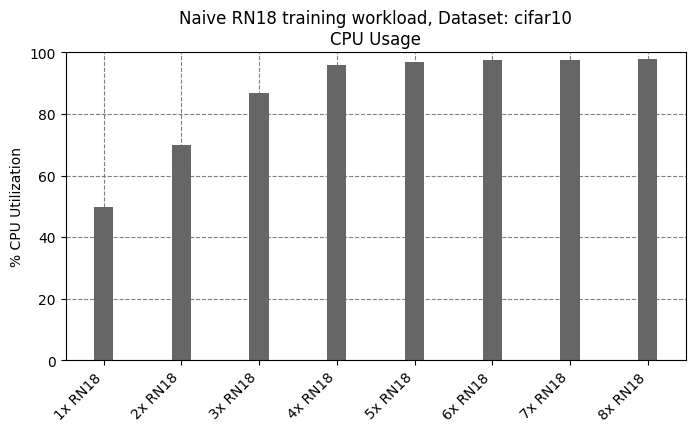

In [73]:
naive = [train_path_2 / model_name / f"pid_{trace_pids[i]}_cpu.out" for i in range(0, 8)]
naive_logs = [train_path_2 / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv" for i in range(0, 8)]

naive_suptitles = [f"{i}x RN18" for i in range(1,9)]

title = f"Naive RN18 training workload, Dataset: {DATASET}"

dfs = [create_plottable_df(path, naive_logs[idx]) for idx, path in enumerate(naive)]

averages = plot_dfs(dfs, title, naive_suptitles, "%nice", True)

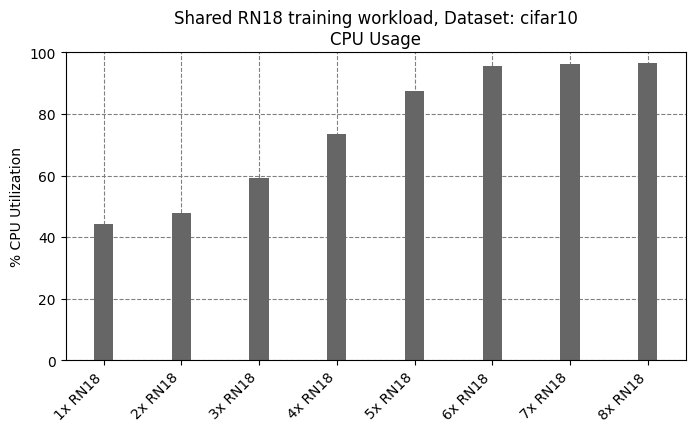

In [82]:
shared = [train_mul_path / f"pid_{trace_pids[i]}_cpu.out" for i in range(16, 20)] + [train_mul_path_2 / f"pid_{trace_pids[i]}_cpu.out" for i in range(20, 24)]
shared_logs = [train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv" for i in range(16, 20)] + [train_mul_path_2 / f"{shared_model_path_prefix}_{pids[i]}.csv" for i in range(20, 24)]

shared_suptitles = [f"{i}x RN18" for i in range(1,9)]

title = f"Shared RN18 training workload, Dataset: {DATASET}"

dfs = [create_plottable_df(path, shared_logs[idx]) for idx, path in enumerate(shared)]

averages = plot_dfs(dfs, title, shared_suptitles, "%nice", True)

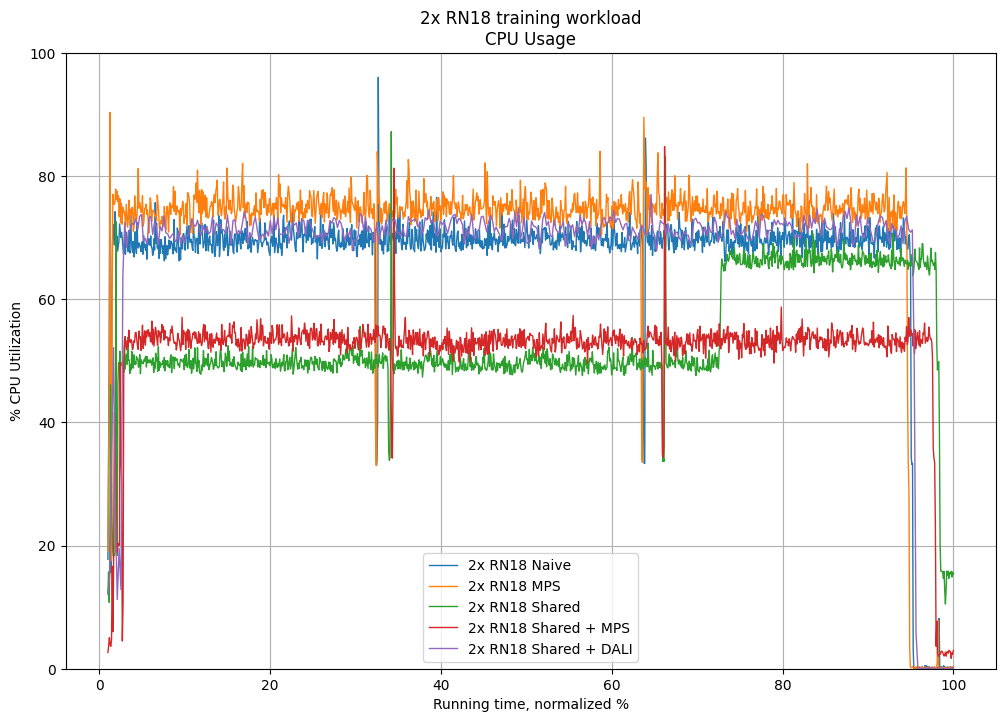

In [138]:
paths = [
    train_path / model_name / f"pid_{trace_pids[1]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[3]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[5]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[7]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[11]}_cpu.out",
]
suptitles = [
    "2x RN18 Naive",
    "2x RN18 MPS",
    "2x RN18 Shared",
    "2x RN18 Shared + MPS",
    "2x RN18 Shared + DALI"
]
title = "2x RN18 training workload"

dfs = [create_plottable_df(path) for path in paths]

#plot_dfs(dfs, title, suptitles, "%iowait")
plot_dfs(dfs, title, suptitles, "%nice", normalized=True)

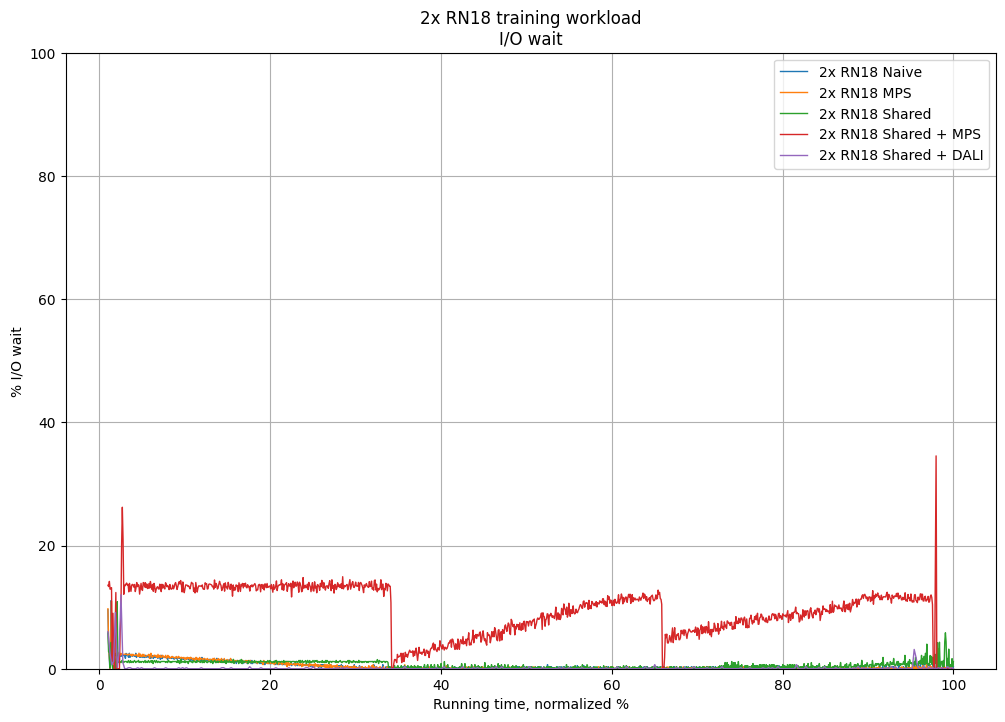

In [139]:
paths = [
    train_path / model_name / f"pid_{trace_pids[1]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[3]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[5]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[7]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[11]}_cpu.out",
]
suptitles = [
    "2x RN18 Naive",
    "2x RN18 MPS",
    "2x RN18 Shared",
    "2x RN18 Shared + MPS",
    "2x RN18 Shared + DALI"
]
title = "2x RN18 training workload"

dfs = [create_plottable_df(path) for path in paths]

#plot_dfs(dfs, title, suptitles, "%iowait")
plot_dfs(dfs, title, suptitles, "%iowait", normalized=True)